# Coffee and Productivity

Does coffee consumption in a population correlate with higher productivity as measured in GDP per hour worked?

Background: On an individual level, consumption of coffee and its active ingredient, caffeine (a stimulant), is associated with higher levels of “energy” and “productivity”. But in a given population, such as a nation-state, does higher coffee consumption indicate a higher level of productivity? 


In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
coffee_data_to_load = "../data/project_data_with_percapita_consumption.csv"

# Read the Data
coffee_data = pd.read_csv(coffee_data_to_load)

# coffee_data.head()

#plt.rcParams["figure.figsize"] = 16,9

In [3]:
country_type_colors = ['#78C850',  # Austria
                    '#F08030',  # Belgium
                    '#6890F0',  # Bulgaria
                    '#A8B820',  # Croatia
                    '#A8A878',  # Czech Republic
                    '#A040A0',  # Denmark
                    '#F8D030',  # Finland
                    '#E0C068',  # France
                    '#EE99AC',  # Germany
                    '#C03028',  # Greece
                    '#F85888',  # Hungary
                    '#B8A038',  # Ireland
                    '#705898',  # Italy
                    '#98D8D8',  # Japan
                    '#7038F8',  # Latvia
                    '#78C850',  # Lithuania
                    '#F08030',  # Luxembourg
                    '#6890F0',  # Netherlands
                    '#A8B820',  # Norway
                    '#A8A878',  # Poland
                    '#A040A0',  # Portugal
                    '#F8D030',  # Romania
                    '#E0C068',  # Russian Federation
                    '#EE99AC',  # Slovenia
                    '#C03028',  # Spain
                    '#F85888',  # Sweden
                    '#B8A038',  # Switzerland
                    '#705898',  # United Kingdom
                    '#98D8D8'] # United States of America

# 1. World Coffee Consumption

### Worldwide Coffee Consumption Trend

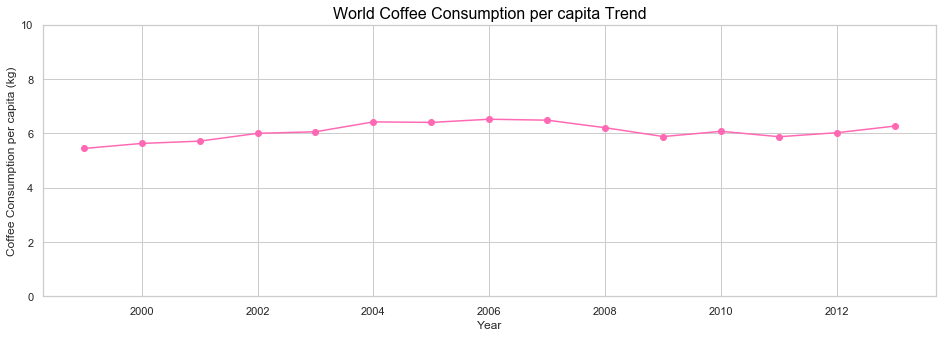

In [68]:
# Store the Coffee Consumption Data Grouped by Country and Year 
coffee_consumption_trend = coffee_data[["Country Name","Year","Coffee Consumed per Capita in Kg"]]

# Preview DataFrame
df_coffee_consumption = coffee_consumption_trend.pivot(index="Year", columns="Country Name",values="Coffee Consumed per Capita in Kg")

# Draw line of overall coffee consumption 
df_coffee_consumption.mean(axis=1).plot(marker="o", color = "#FF69B4", linestyle = "-", ylim=(0,10))

# Add title and x,y labels
plt.title("World Coffee Consumption per capita Trend", loc='center', fontsize=16, fontweight=0, color='black')
plt.ylabel("Coffee Consumption per capita (kg)")
plt.xlabel("Year")

plt.rcParams["figure.figsize"] = 16,5

### Coffee Consumption Trend by Country

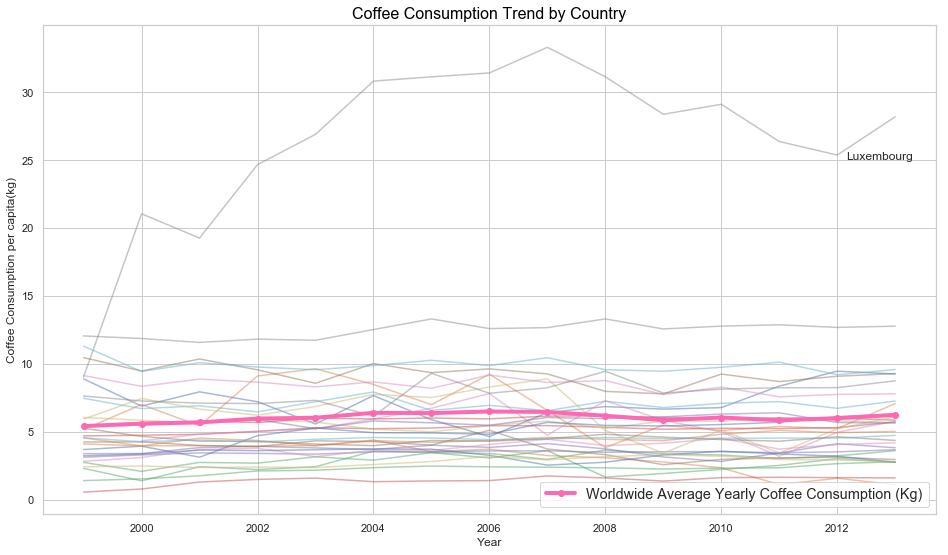

In [72]:
year = coffee_data.iloc[:,1].unique()
coffee_consumption_by_country = coffee_data[["Country Name","Year","Coffee Consumed per Capita in Kg"]]
coffee_consumption_per_capita = coffee_consumption_by_country.pivot(index="Year", columns="Country Name", values="Coffee Consumed per Capita in Kg")
avg_cofee_consumption_data = coffee_consumption_per_capita.mean(axis=1)

import seaborn as sns
# Create figure with subplots
figure, ax = plt.subplots()

# Plot line for average worldwide consumption
ax.plot(coffee_consumption_per_capita, alpha = .5)

ax.plot(year, avg_cofee_consumption_data, linewidth=4, marker="o", color = "#FF69B4", linestyle = "-", label = "Worldwide Average Yearly Coffee Consumption (Kg)")
        #, label = "Worldwide Average Yearly Coffee Consumption (Kg)")

# Add legend for avg worldwide consumption
legend1 = ax.legend(loc='lower right', fontsize='large')

# Add text to highlight outlier country
ax.text(.9, .74, "Luxembourg", transform=ax.transAxes, fontsize=12,
        verticalalignment='top')

# Add titles
plt.title("Coffee Consumption Trend by Country", loc='Center', fontsize=16, fontweight=0, color='black')
plt.xlabel("Year")
plt.ylabel("Coffee Consumption per capita(kg)")

plt.rcParams["figure.figsize"] = 16,9

# 2. Productivity

### Mean GDP Per Hour Worked

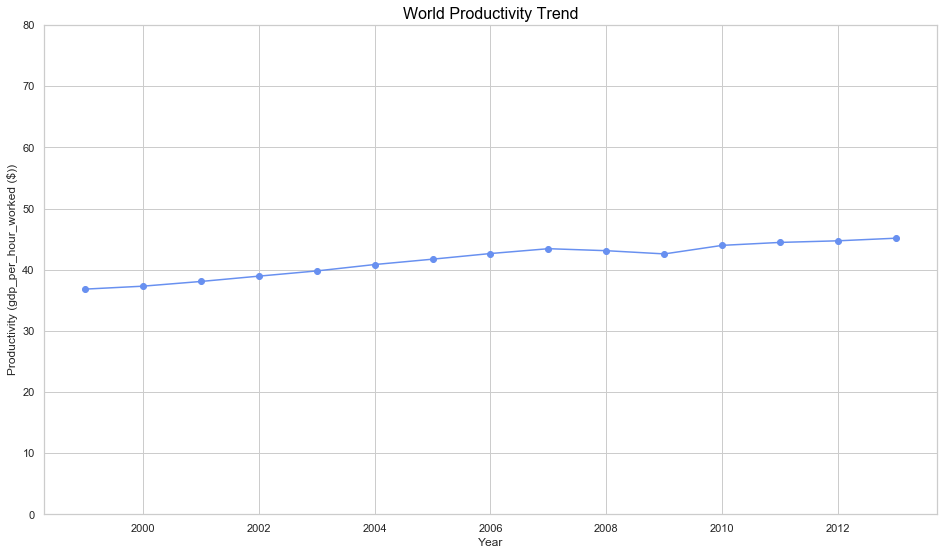

In [73]:
# Store the Productivity(GDP per hour worked) Data Grouped by Country and Year 
productivity_trend = coffee_data[["Country Name","Year","gdp_per_hour_worked ($)"]]

# Preview DataFrame
df_productivity_trend =productivity_trend.pivot(index="Year", columns="Country Name", values="gdp_per_hour_worked ($)")

# Generate the Plot (with Error Bars)
graph_productivity_trend = df_productivity_trend.mean(axis=1).plot(marker="o", color = "#6890F0", linestyle = "-",  ylim=(0,80))

#style
plt.title("World Productivity Trend", loc='center', fontsize=16, fontweight=0, color='black')
graph_productivity_trend.set_ylabel("Productivity (gdp_per_hour_worked ($))")
graph_productivity_trend.set_xlabel("Year")

plt.rcParams["figure.figsize"] = 16,5

# Draw line of overall productivity 
#df_productivity_trend.mean(axis=1).plot()

### Productivity Trend by Country

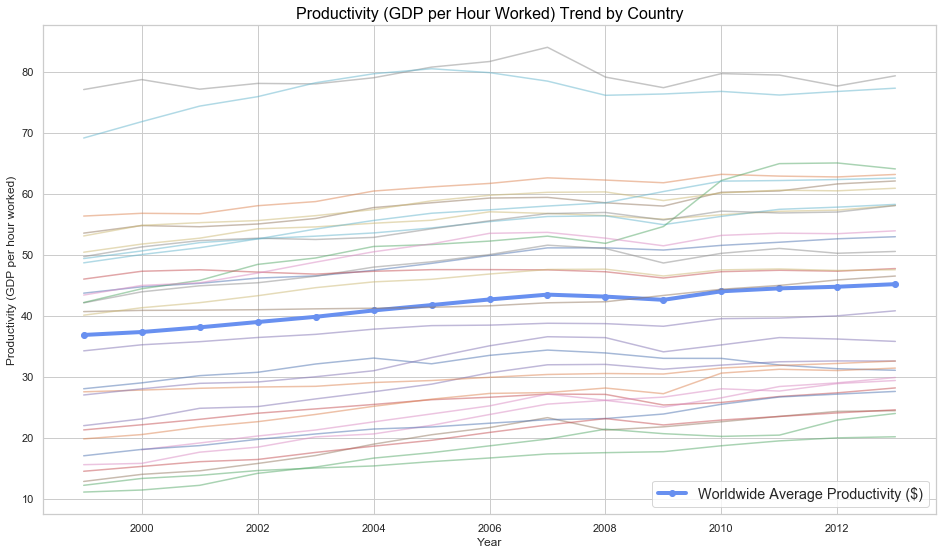

In [75]:
#graph_productivity_by_country = df_productivity_trend.plot()

year = coffee_data.iloc[:,1].unique()
productivity_by_country = coffee_data[["Country Name","Year","gdp_per_hour_worked ($)"]]

productivity_trend =productivity_by_country.pivot(index="Year", columns="Country Name", values="gdp_per_hour_worked ($)")
avg_productivity_data = productivity_trend.mean(axis=1)

# Create figure with subplots
figure, ax = plt.subplots()

# Plot line for average worldwide consumption
ax.plot(year, avg_productivity_data, linewidth=4, marker="o", color = "#6890F0", linestyle = "-", label = "Worldwide Average Productivity ($)")
ax.plot(productivity_trend, alpha = .5)

# Add legend for avg worldwide consumption
legend1 = ax.legend(loc='lower right', fontsize='large')

# Add titles
plt.title("Productivity (GDP per Hour Worked) Trend by Country", loc='Center', fontsize=16, fontweight=0, color='black')
plt.xlabel("Year")
plt.ylabel("Productivity (GDP per hour worked)")

#style
#graph_productivity_by_country.set_ylabel("Productivity (GDP per hour worked)")
#graph_productivity_by_country.set_xlabel("Year")

plt.rcParams["figure.figsize"] = 16,9

# Draw line of productivity Trend by country
#df_productivity_trend.plot()


### Mean Coffee Consumption and Mean of Productivity by Year

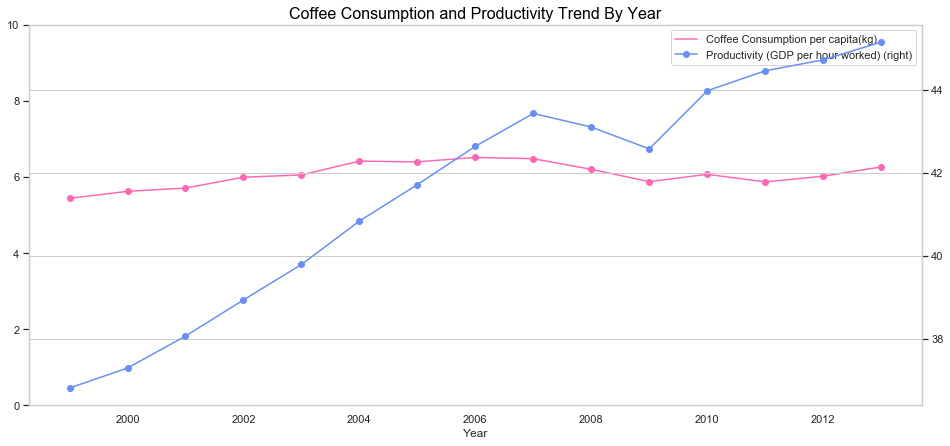

In [66]:
# Store the Coffee Consumption Data Grouped by Country and Year 
coffee_consumption_trend = coffee_data[["Country Name","Year","Coffee Consumed per Capita in Kg"]]

# Preview DataFrame
df_coffee_consumption = coffee_consumption_trend.pivot(index="Year", columns="Country Name",values="Coffee Consumed per Capita in Kg")

# Draw line of overall coffee consumption and productivity (multiple axis with different scales)

df_coffee_consumption.mean(axis=1).plot(label="Coffee Consumption per capita(kg)", color = "#FF69B4", legend=True, marker="o", linestyle = "-",  ylim=(0,10))
df_productivity_trend.mean(axis=1).plot(secondary_y=True, label="Productivity (GDP per hour worked)", color = "#6890F0", legend=True, marker="o", linestyle = "-" )

# Add title and x,y labels
plt.title("Coffee Consumption and Productivity Trend By Year", loc='center', fontsize=16, fontweight=0, color='black')

plt.rcParams["figure.figsize"] = 16,7
# Save the 
#plt.savefig('graph_coffee_productivity_trend.png', bbox_inches="tight")

# 3. Coffee Consumption and GDP per hour worked - Rankings

### Top Countries by Coffee Consumption

In [33]:
#coffee_data.tail()
coffee_data.head()
coffee_data.columns

# Top 10 cofee drinking nations
group_by_country = coffee_data.groupby(["Country Name"])
#Mean of all values by country
mean_values_country = group_by_country.mean()
mean_values_country_df = pd.DataFrame(mean_values_country)
#mean_values_country_df

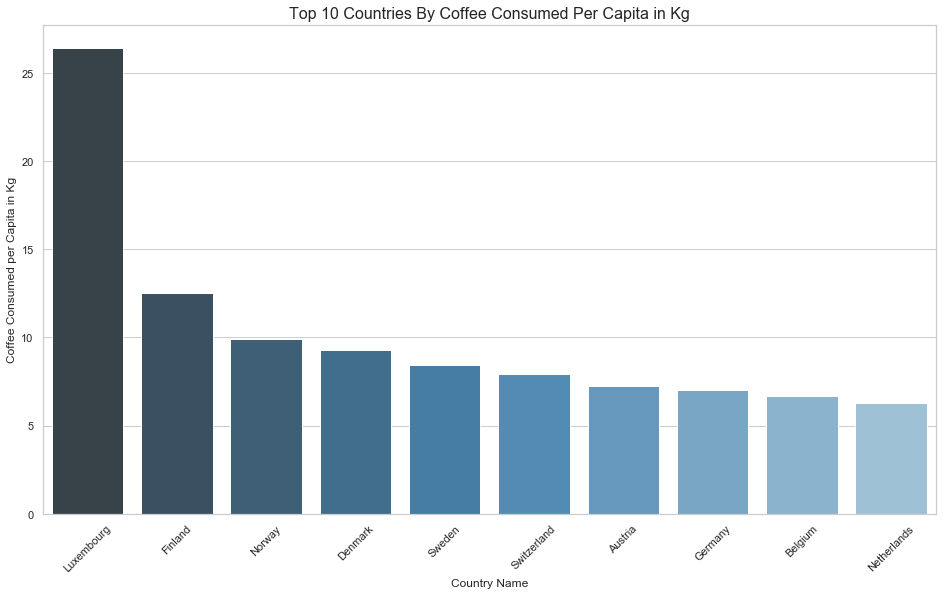

In [84]:
# Top 10 Coffee drinking per capita
#top_coffee_pc = mean_values_country_df.sort_values("Coffee Consumed per Capita in Kg", ascending = False).reset_index()

top_coffee_pc = mean_values_country_df.sort_values("Coffee Consumed per Capita in Kg", ascending = False)\
.head(10).reset_index()

#top_coffee_pc
#plt.figure(figsize=(20,10))
sns.set(font_scale = 1.0, style="whitegrid")
g=sns.barplot(x='Country Name',y='Coffee Consumed per Capita in Kg',data=top_coffee_pc,  palette="Blues_d")

# Labels for the Graph
plt.xticks(rotation=45)
plt.title('Top 10 Countries By Coffee Consumed Per Capita in Kg', size =16)

plt.rcParams["figure.figsize"] = 16,9
#plt.savefig("Top_10_Coffee.png")
#plt.show()

In [13]:
### Coffee Consumption per Capita by Country (option2: all countries)

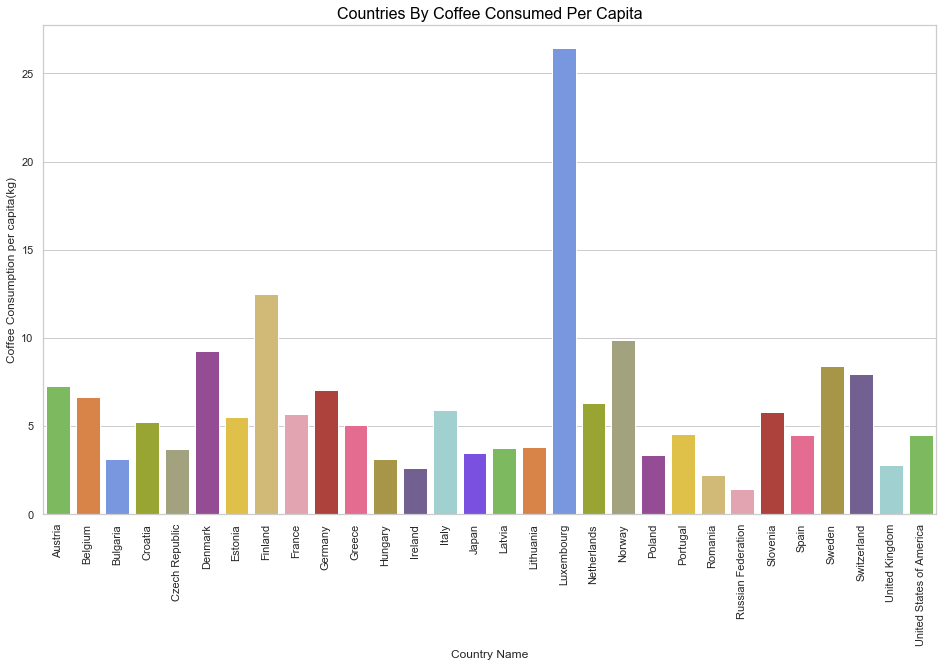

In [78]:
# Store the Coffee Consumption per Capita Data Grouped by Country and Year 
coffee_per_capita = coffee_data[["Country Name","Year","Coffee Consumed", "population", "Coffee Consumed per Capita in Kg"]]

# mean of coffee comsumption during period
coffee_consumed_per_capita = coffee_per_capita.groupby(["Country Name"])["Coffee Consumed per Capita in Kg"].agg(["mean"]).reset_index()

#coffee_consumed_per_capita

sns.set(style="whitegrid")

ax = sns.barplot(x="Country Name", y="mean", data = coffee_consumed_per_capita, palette = country_type_colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.title("Countries By Coffee Consumed Per Capita", loc='Center', fontsize=16, fontweight=0, color='black')
plt.xlabel("Country Name")
plt.ylabel("Coffee Consumption per capita(kg)")

plt.rcParams["figure.figsize"] = 16,9

### Top Countries by GDP Per Hour Worked
Which Countries Show Higher Productivity Compare to Other Countries?

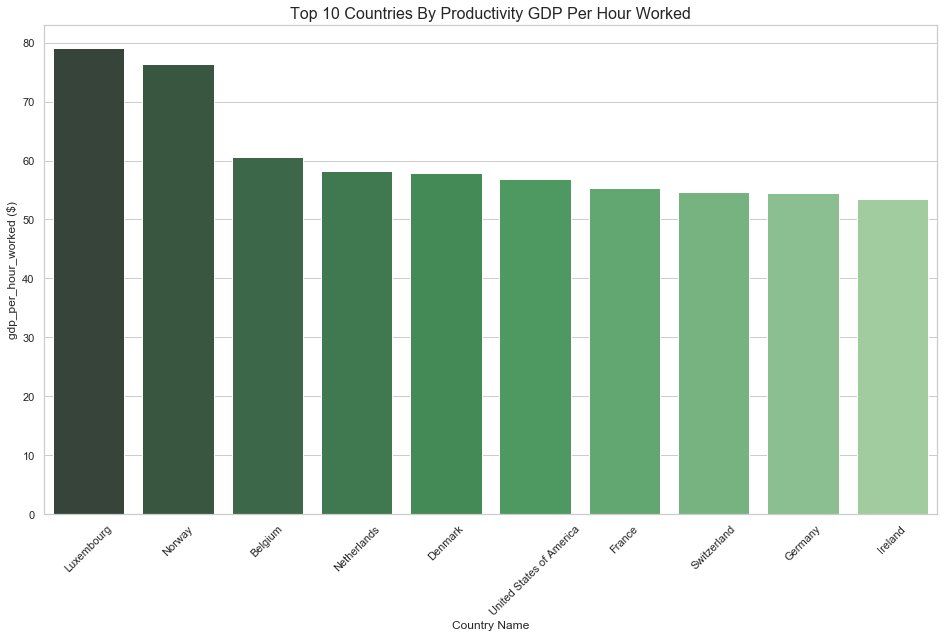

In [82]:
# Top 10 productivity countries per capita
top_productivity_pc = mean_values_country_df.sort_values("gdp_per_hour_worked ($)", ascending = False)\
.head(10).reset_index()

#top 10 Coffee drinking per person graph
#plt.figure(figsize=(20,8))
sns.set(font_scale = 1.0, style="whitegrid")
g=sns.barplot(x='Country Name',y='gdp_per_hour_worked ($)',data=top_productivity_pc, palette="Greens_d")

# Labels for the Graph
plt.xticks(rotation=45)
plt.title('Top 10 Countries By Productivity GDP Per Hour Worked', size =16)

plt.rcParams["figure.figsize"] = 16,9

#plt.savefig("Top_10_Productive.png")
#plt.show()

### Top Countries by GDP Per Hour Worked (option2: all countiries)

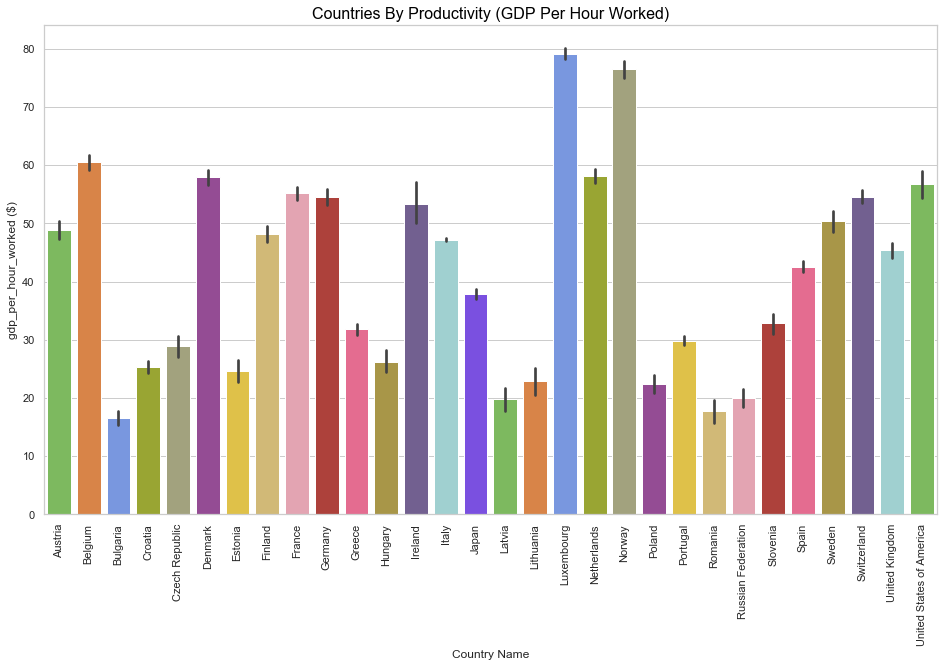

In [85]:
# Plot the productivity by country

ax = sns.barplot(x="Country Name", y="gdp_per_hour_worked ($)", data = coffee_data, palette = country_type_colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.title("Countries By Productivity (GDP Per Hour Worked)", loc='Center', fontsize=16, fontweight=0, color='black')
plt.xlabel("Country Name")
plt.ylabel("gdp_per_hour_worked ($)")

plt.rcParams["figure.figsize"] = 16,9


# 4. Correlation between Coffee Consumption and GDP Per Hour Worked


## 4-1. Does the amount of Coffee Consumption affect Productivity among countries?

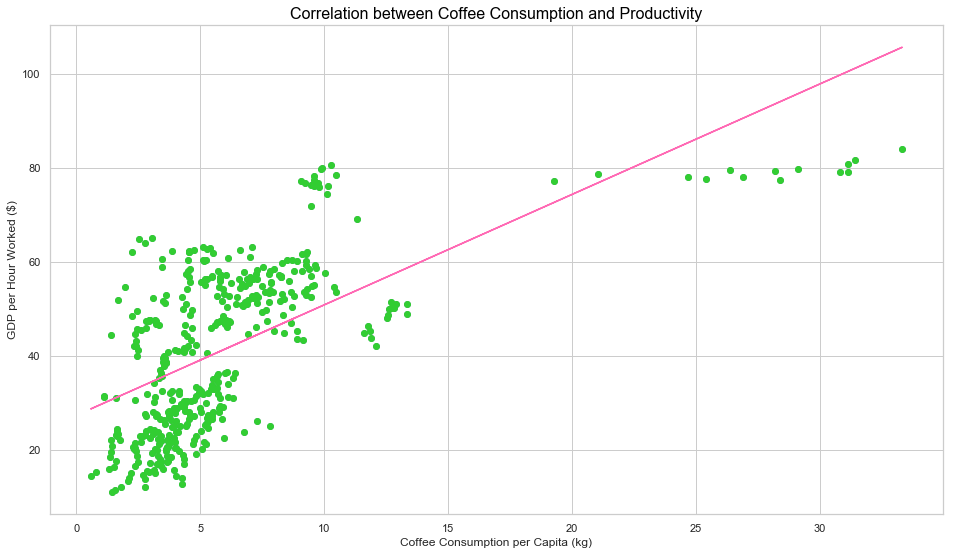

In [37]:
# define x-axis and y-axis
x = coffee_data["Coffee Consumed per Capita in Kg"]
y = coffee_data["gdp_per_hour_worked ($)"]

plt.scatter(x, y, alpha=0.5)

import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

# Add titles
plt.title("Correlation between Coffee Consumption and Productivity", loc='center', fontsize=16, fontweight=0, color='black')
plt.xlabel("Coffee Consumption per Capita (kg)")
plt.ylabel("GDP per Hour Worked ($)")

# Fit with polyfit
b, m = polyfit(x, y, 1)

plt.plot(x, y, '.', color="limegreen", marker="o")
plt.plot(x, b + m * x, '-', color = "hotpink")
plt.show()


plt.rcParams["figure.figsize"] = 16,9


### correlation coefficient and p-value

In [92]:
# Spearman 
from scipy.stats import spearmanr
spearmanr(x.values, y.values)

SpearmanrResult(correlation=0.6651688938381588, pvalue=1.1140237618904332e-58)

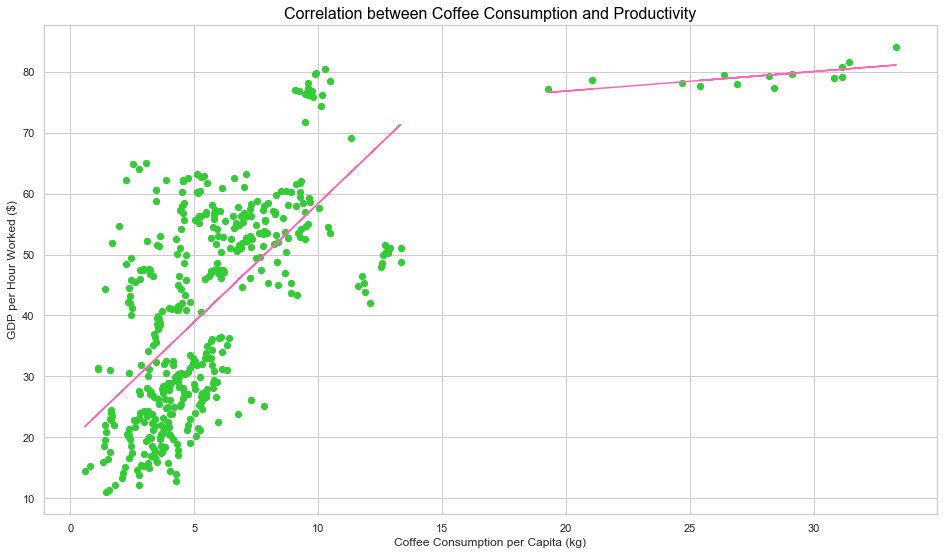

In [57]:
# define x-axis and y-axis
x_smaller = x.iloc[x.values < 15]
y_smaller = y.loc[x_smaller.index.tolist()]

x_larger = x.iloc[x.values >= 15]
y_larger = y.iloc[x_larger.index.tolist()]


# Add titles
plt.title("Correlation between Coffee Consumption and Productivity", loc='center', fontsize=16, fontweight=0, color='black')
plt.xlabel("Coffee Consumption per Capita (kg)")
plt.ylabel("GDP per Hour Worked ($)")

plt.scatter(x, y, alpha=0.5)

# Fit with polyfit
b_smaller, m_smaller = polyfit(x_smaller, y_smaller, 1)
b_larger, m_larger = polyfit(x_larger, y_larger, 1)

plt.plot(x_smaller, y_smaller, '.', color="limegreen", marker="o")
plt.plot(x_smaller, b_smaller + m_smaller * x_smaller, '-', color = "hotpink")

plt.plot(x_larger, y_larger, '.', color="limegreen", marker="o")
plt.plot(x_larger, b_larger + m_larger * x_larger, '-', color = "hotpink")


plt.rcParams["figure.figsize"] = 16,9


### P-Values for <15k coffee consumption

In [93]:
# Spearman 
from scipy.stats import spearmanr
spearmanr(x_smaller.values, y_smaller.values)

SpearmanrResult(correlation=0.6319734902768038, pvalue=7.022143773167701e-50)

### P-Values for >15k coffee consumption

In [94]:
# Spearman
from scipy.stats import spearmanr
spearmanr(x_larger.values, y_larger.values)

SpearmanrResult(correlation=0.7362637362637363, pvalue=0.0026764473596131945)

In [96]:
m_smaller

3.888857469852688

## 4-3. Correlation of Changes in Coffee Consumption and Productivity: Does the Changes in the Coffee Consumption Correlated with the Changes in Productivity?

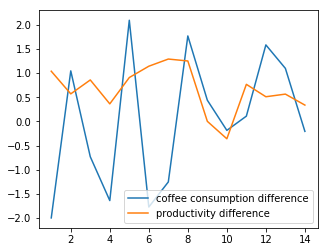

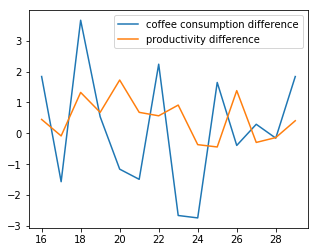

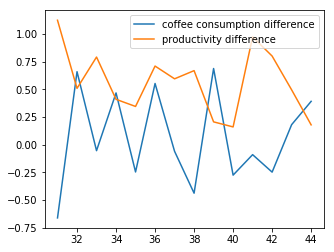

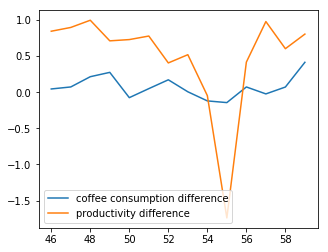

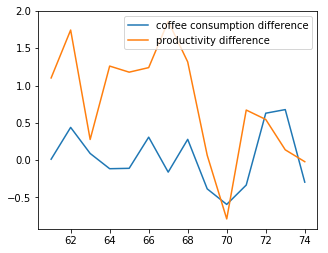

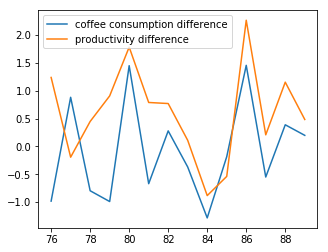

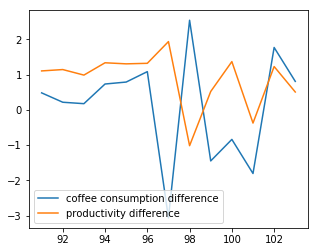

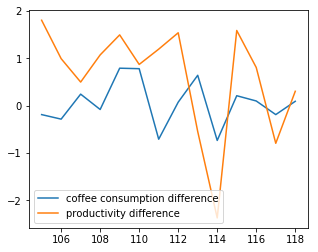

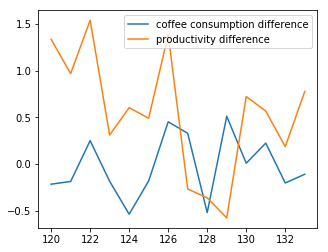

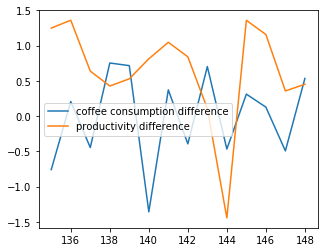

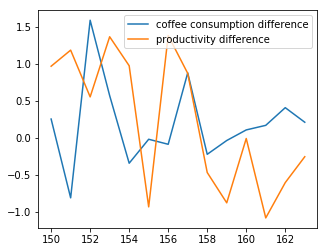

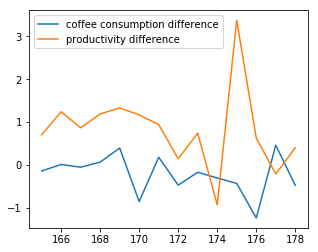

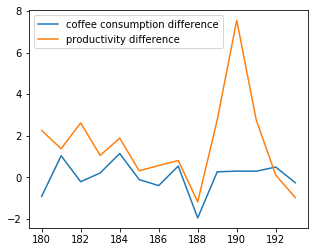

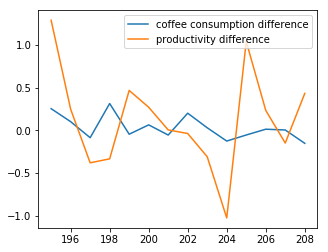

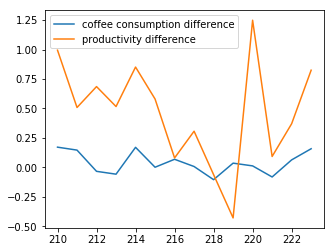

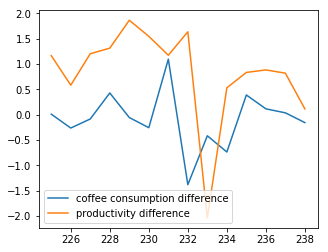

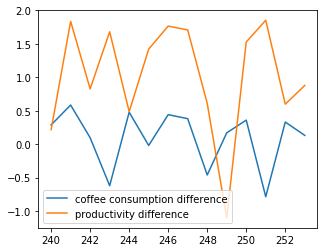

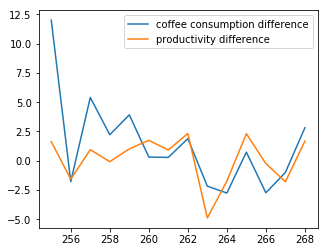

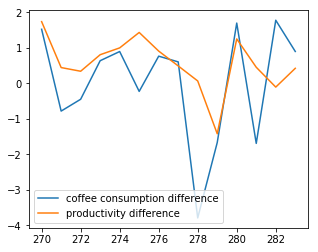

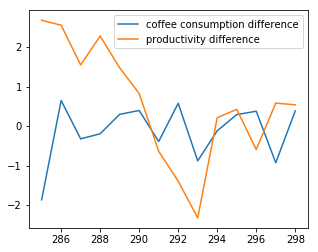

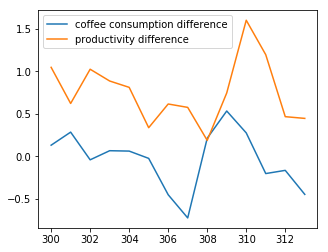

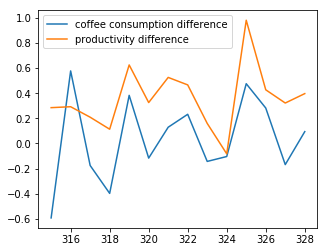

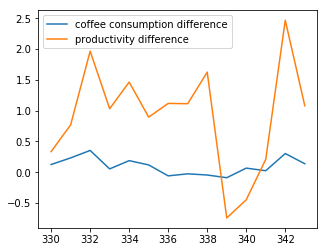

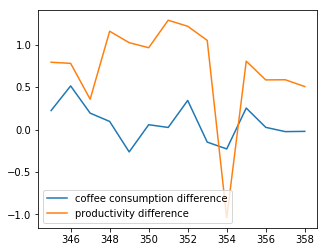

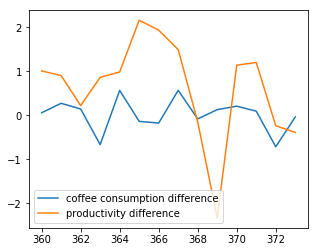

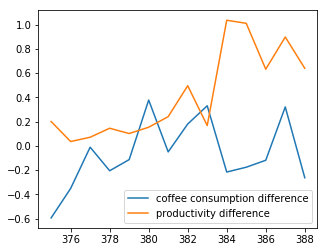

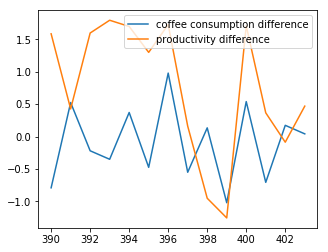

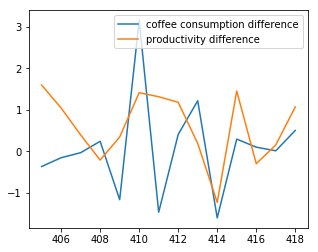

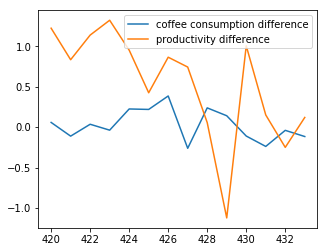

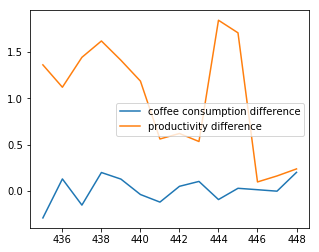

In [18]:
base_delta_data = coffee_data[["Country Name", "Year","gdp_per_hour_worked ($)", "Coffee Consumed per Capita in Kg" ]].reset_index()

calculate_delta_data = base_delta_data.drop(columns = ["Year"]).groupby("Country Name").diff().rename(index=str, columns = {"Coffee Consumed per Capita in Kg" : "coffee consumption difference", "gdp_per_hour_worked ($)":"productivity difference" }).reset_index()
calculate_delta_data["productivity difference"] = calculate_delta_data["productivity difference"]  #scale "productivity difference"
df_delta_data_extended = pd.concat([base_delta_data, calculate_delta_data], axis=1).drop(columns = ["index","level_0"])
#df_delta_data_extended.head()

df_delta_data_extended.groupby("Country Name")[["coffee consumption difference","productivity difference"]].plot()
df_delta_data_extended[["coffee consumption difference","productivity difference"]].corr()

plt.rcParams["figure.figsize"] = 5,4

### changes in coffee consumption and changes in productivity for each country every year

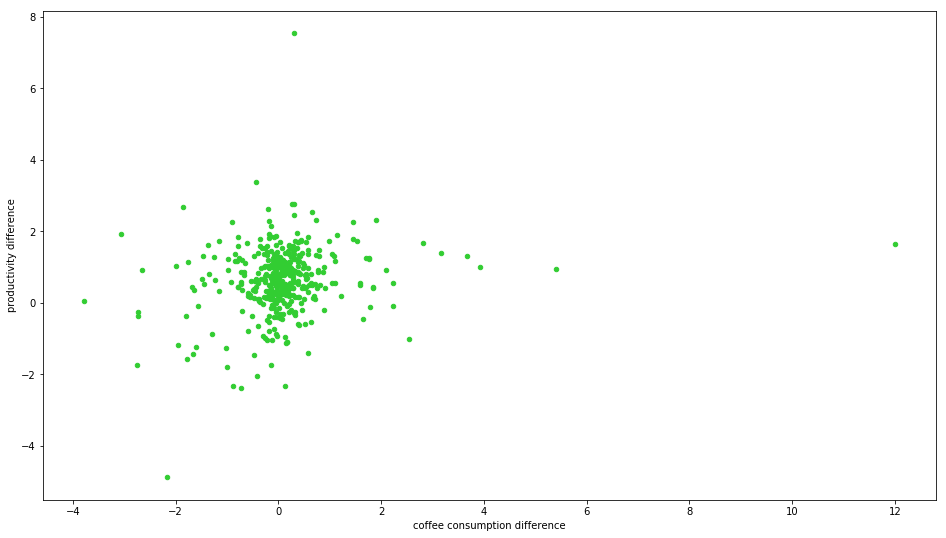

In [31]:
x_cha = calculate_delta_data["coffee consumption difference"].dropna()
y_cha = calculate_delta_data["productivity difference"].dropna()

import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

calculate_delta_data.plot.scatter("coffee consumption difference", "productivity difference",color = "limegreen")

# Fit with polyfit
#b, m = polyfit(x_cha, y_cha, 1)

#plt.plot(x_cha, y_cha, '.', color="limegreen", marker="o")
#plt.plot(x_cha, b + m * x_cha, '-', color = "hotpink")
plt.show()

plt.rcParams["figure.figsize"] = 16,9

In [33]:
#x_cha
calculate_delta_data.corr(method="spearman")

# Spearman 
#from scipy.stats import spearmanr
#spearmanr(x_cha.values, y_cha.values)

,coffee consumption difference,productivity difference,index
coffee consumption difference,1.000000,0.169293,NaN
productivity difference,0.169293,1.000000,NaN
index,NaN,NaN,NaN


# Summary

Amount of coffee consumed and higher productivity measured as GDP per hour worked are correlated.
   (p-value < 0.05 and correlation coefficient = 0.6)
   
According to linear regression, if the amount of coffee consumption is less than 15 kg (33 lbs), productivity increases much faster (bigger slope), while the productivity decreases slowly when the comsumption is larger than 15 kg
   (slope: m<15 = 3.89,  m>15 = 0.32), 
   
The changes in coffee comsumption do not directly affect the changes of productivity. This is because there are several factors that decide productivity and coffee is not the only factor for productivity.


In [102]:
#There appears to be a strong correlation between coffee consumption and productivity of a population as measured in GDP (per hour worked and per capita).

#Some other points to consider:
# - We only looked at coffee consumption and GDP data. There is a wealth of other data to explore. 
# - There are likely to be other correlations as well across the population, implying that coffee consumption and GDP are dependant on other factors not identified.
   